In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings




warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


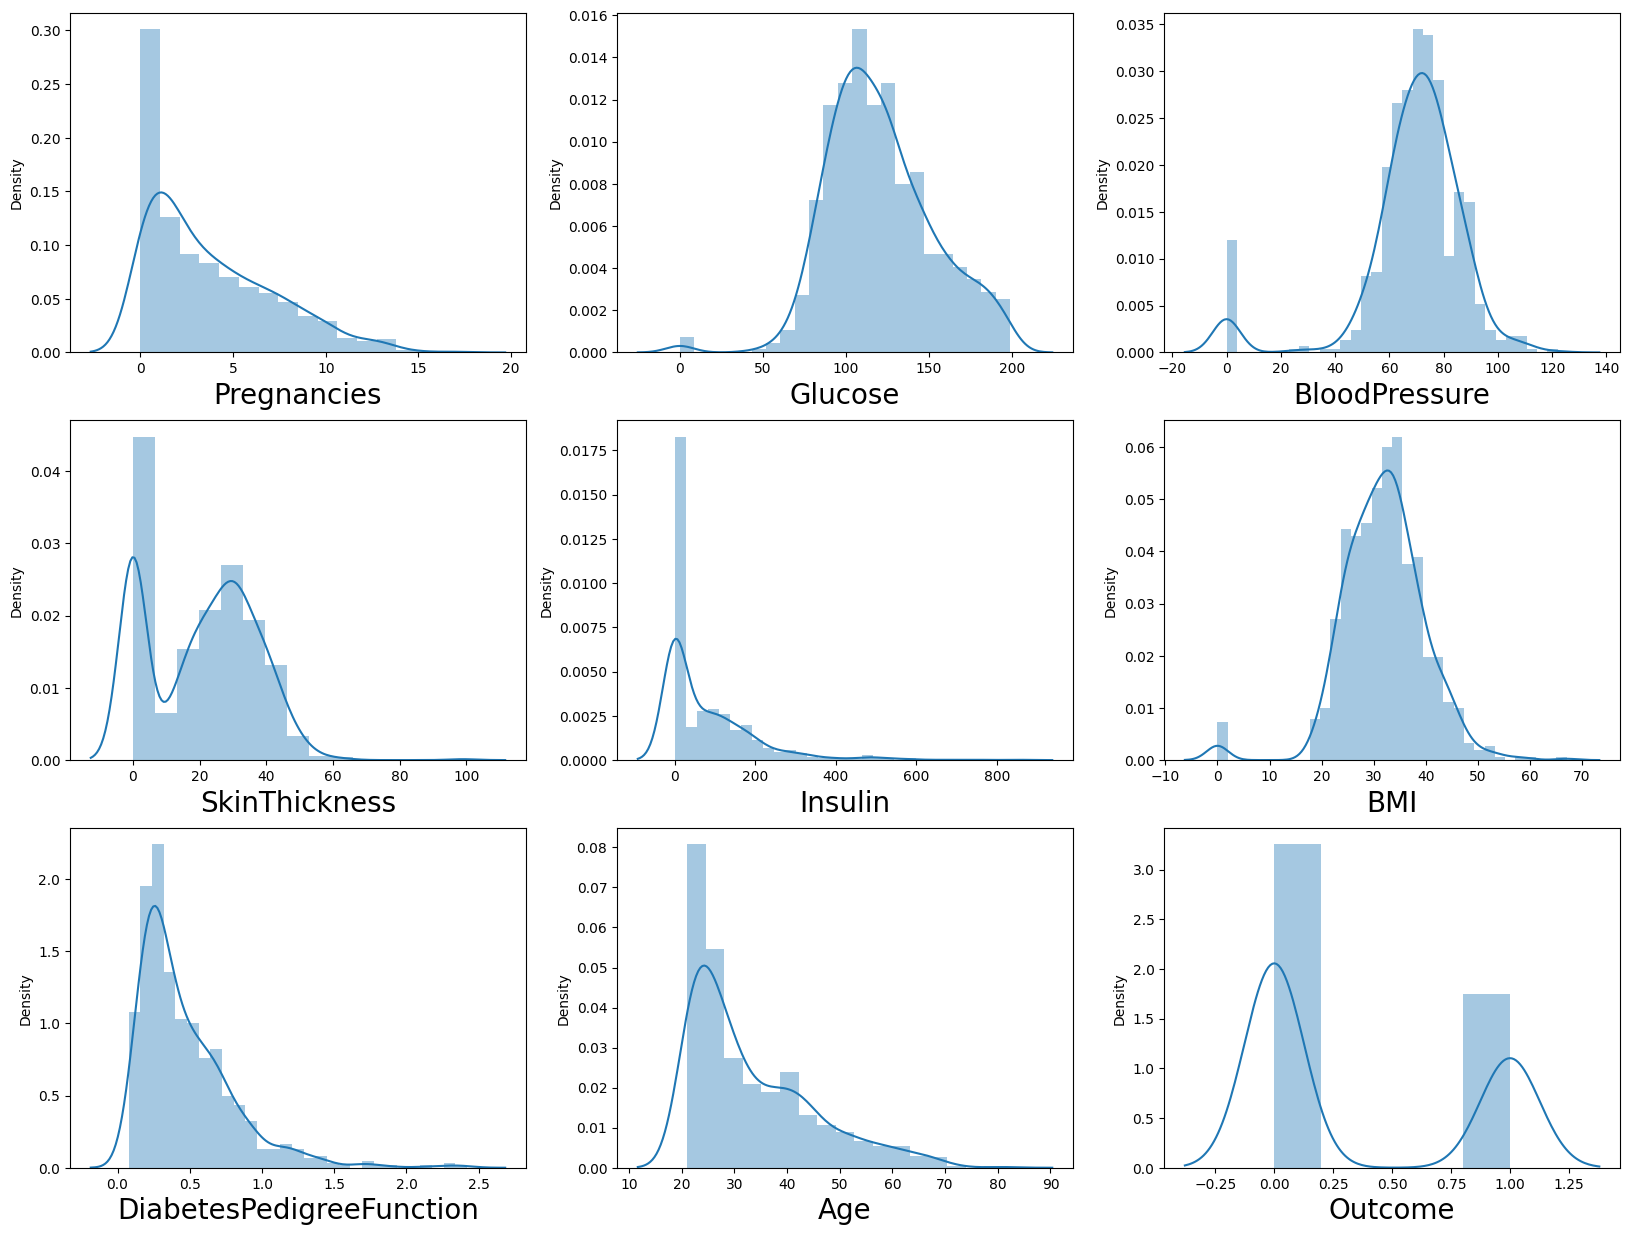

In [5]:
plt.figure(figsize=(20,15),facecolor="white")
plot_num=1

for column in df:
    if plot_num <= 9:
        ax=plt.subplot(3,3,plot_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_num+=1
plt.show()

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

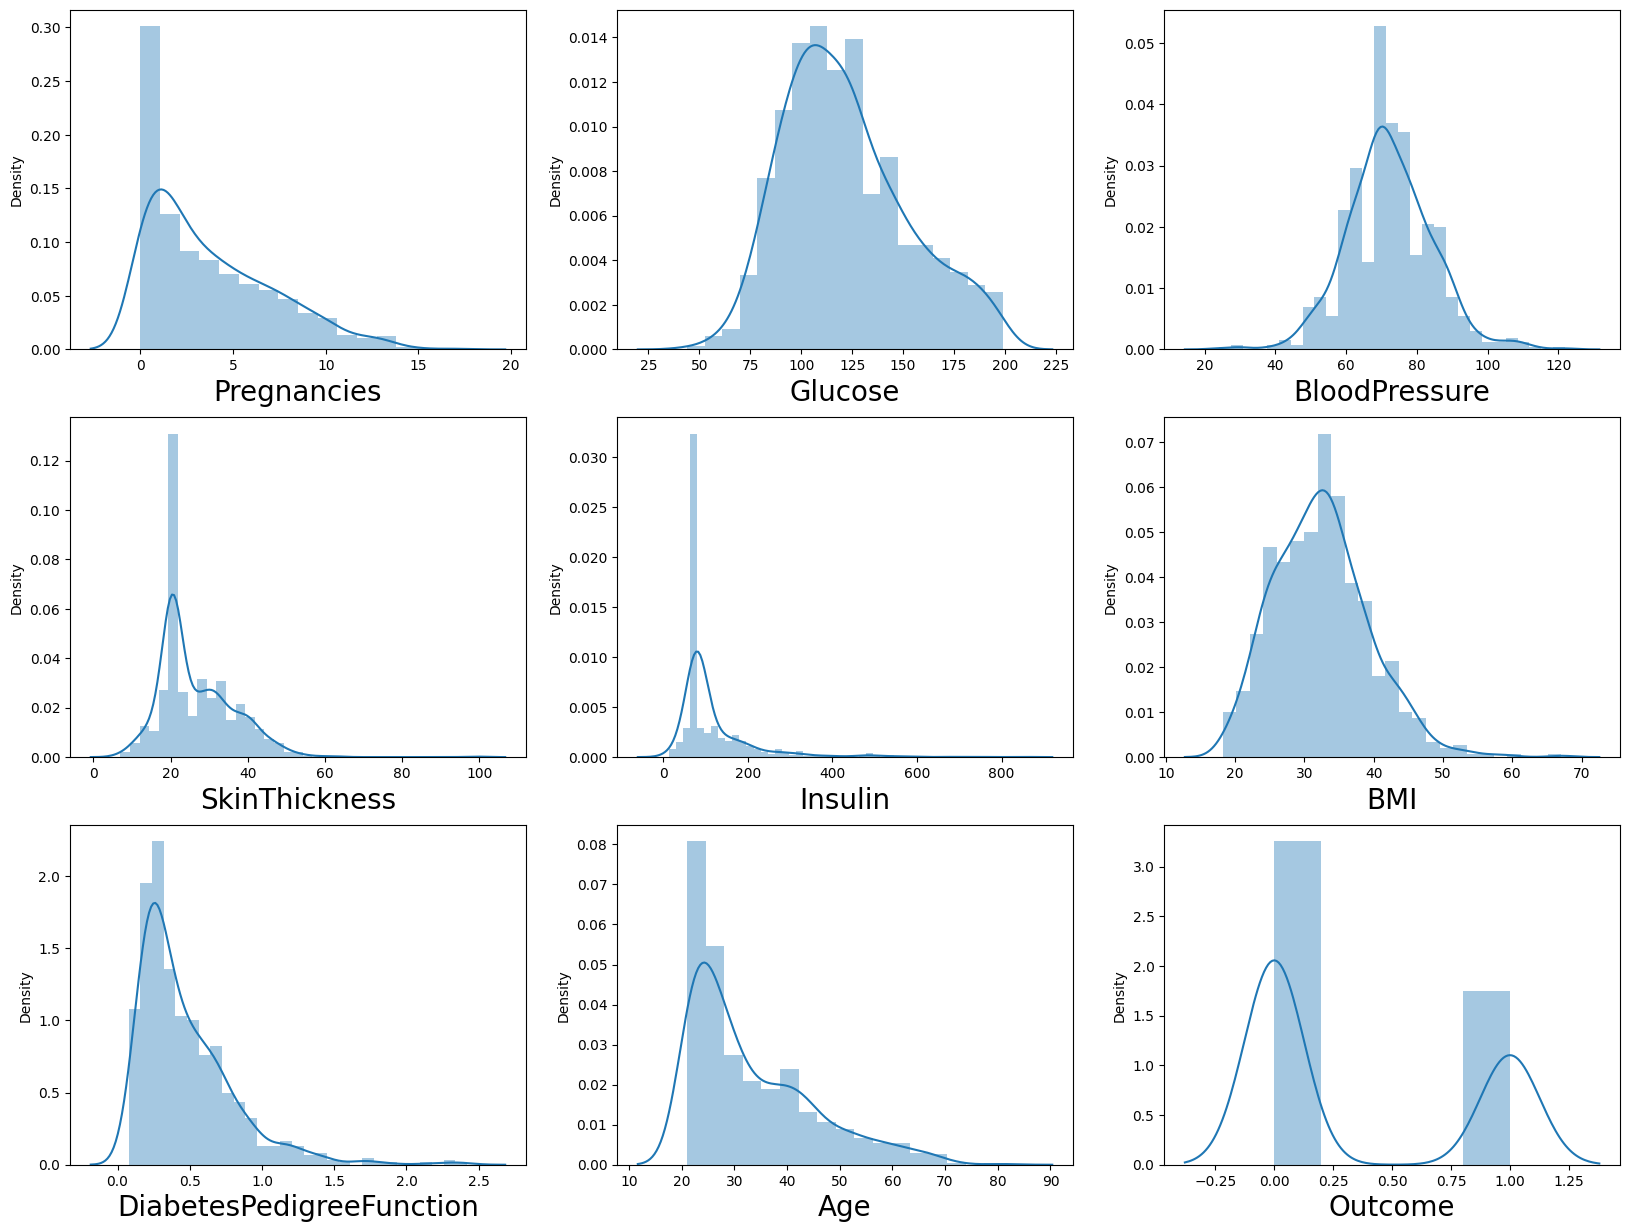

In [8]:
plt.figure(figsize=(20,15),facecolor="white")
plot_num=1

for column in df:
    if plot_num <= 9:
        ax=plt.subplot(3,3,plot_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_num+=1
plt.show()

<AxesSubplot:>

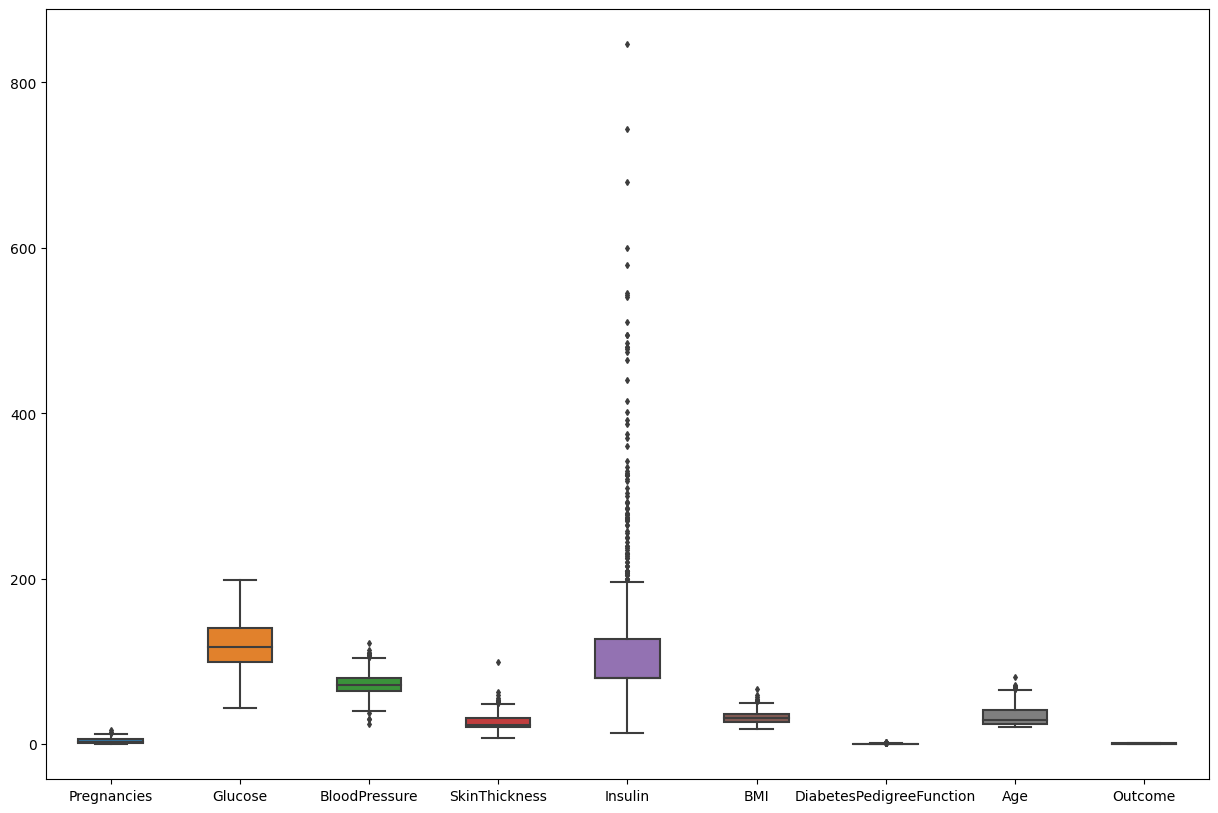

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df , width= 0.5, ax=ax, fliersize=3)

In [10]:
q= df['Pregnancies'].quantile(0.98)
df_cleaned=df[df['Pregnancies']<q]

q= df['BMI'].quantile(0.99)
df_cleaned=df[df['BMI']<q]

q= df['SkinThickness'].quantile(0.99)
df_cleaned=df[df['SkinThickness']<q]

q= df['Insulin'].quantile(0.95)
df_cleaned=df[df['Insulin']<q]

q= df['DiabetesPedigreeFunction'].quantile(0.99)
df_cleaned=df[df['DiabetesPedigreeFunction']<q]

q= df['Age'].quantile(0.98)
df_cleaned=df[df['Age']<q]





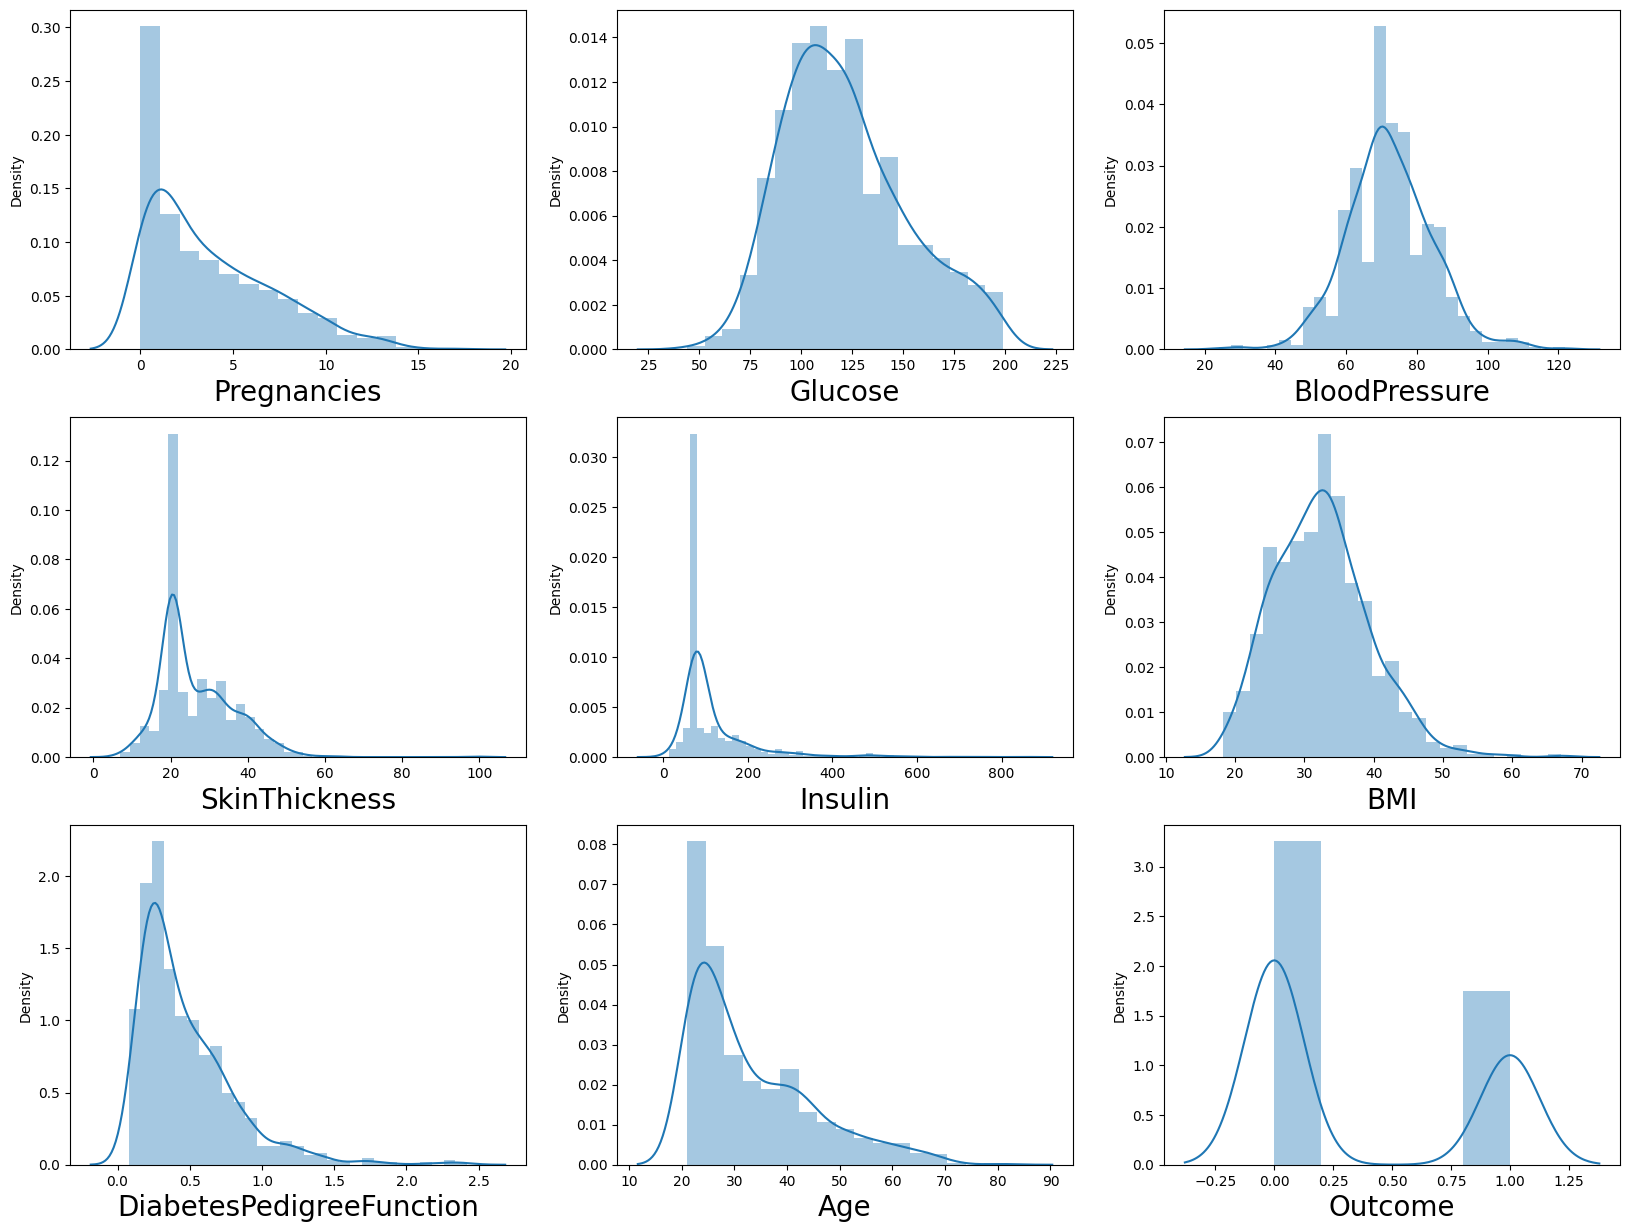

In [11]:
plt.figure(figsize=(20,15),facecolor="white")
plot_num=1

for column in df:
    if plot_num <= 9:
        ax=plt.subplot(3,3,plot_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_num+=1
plt.show()

In [12]:
X= df.drop(columns = ['Outcome'])
y=df['Outcome']

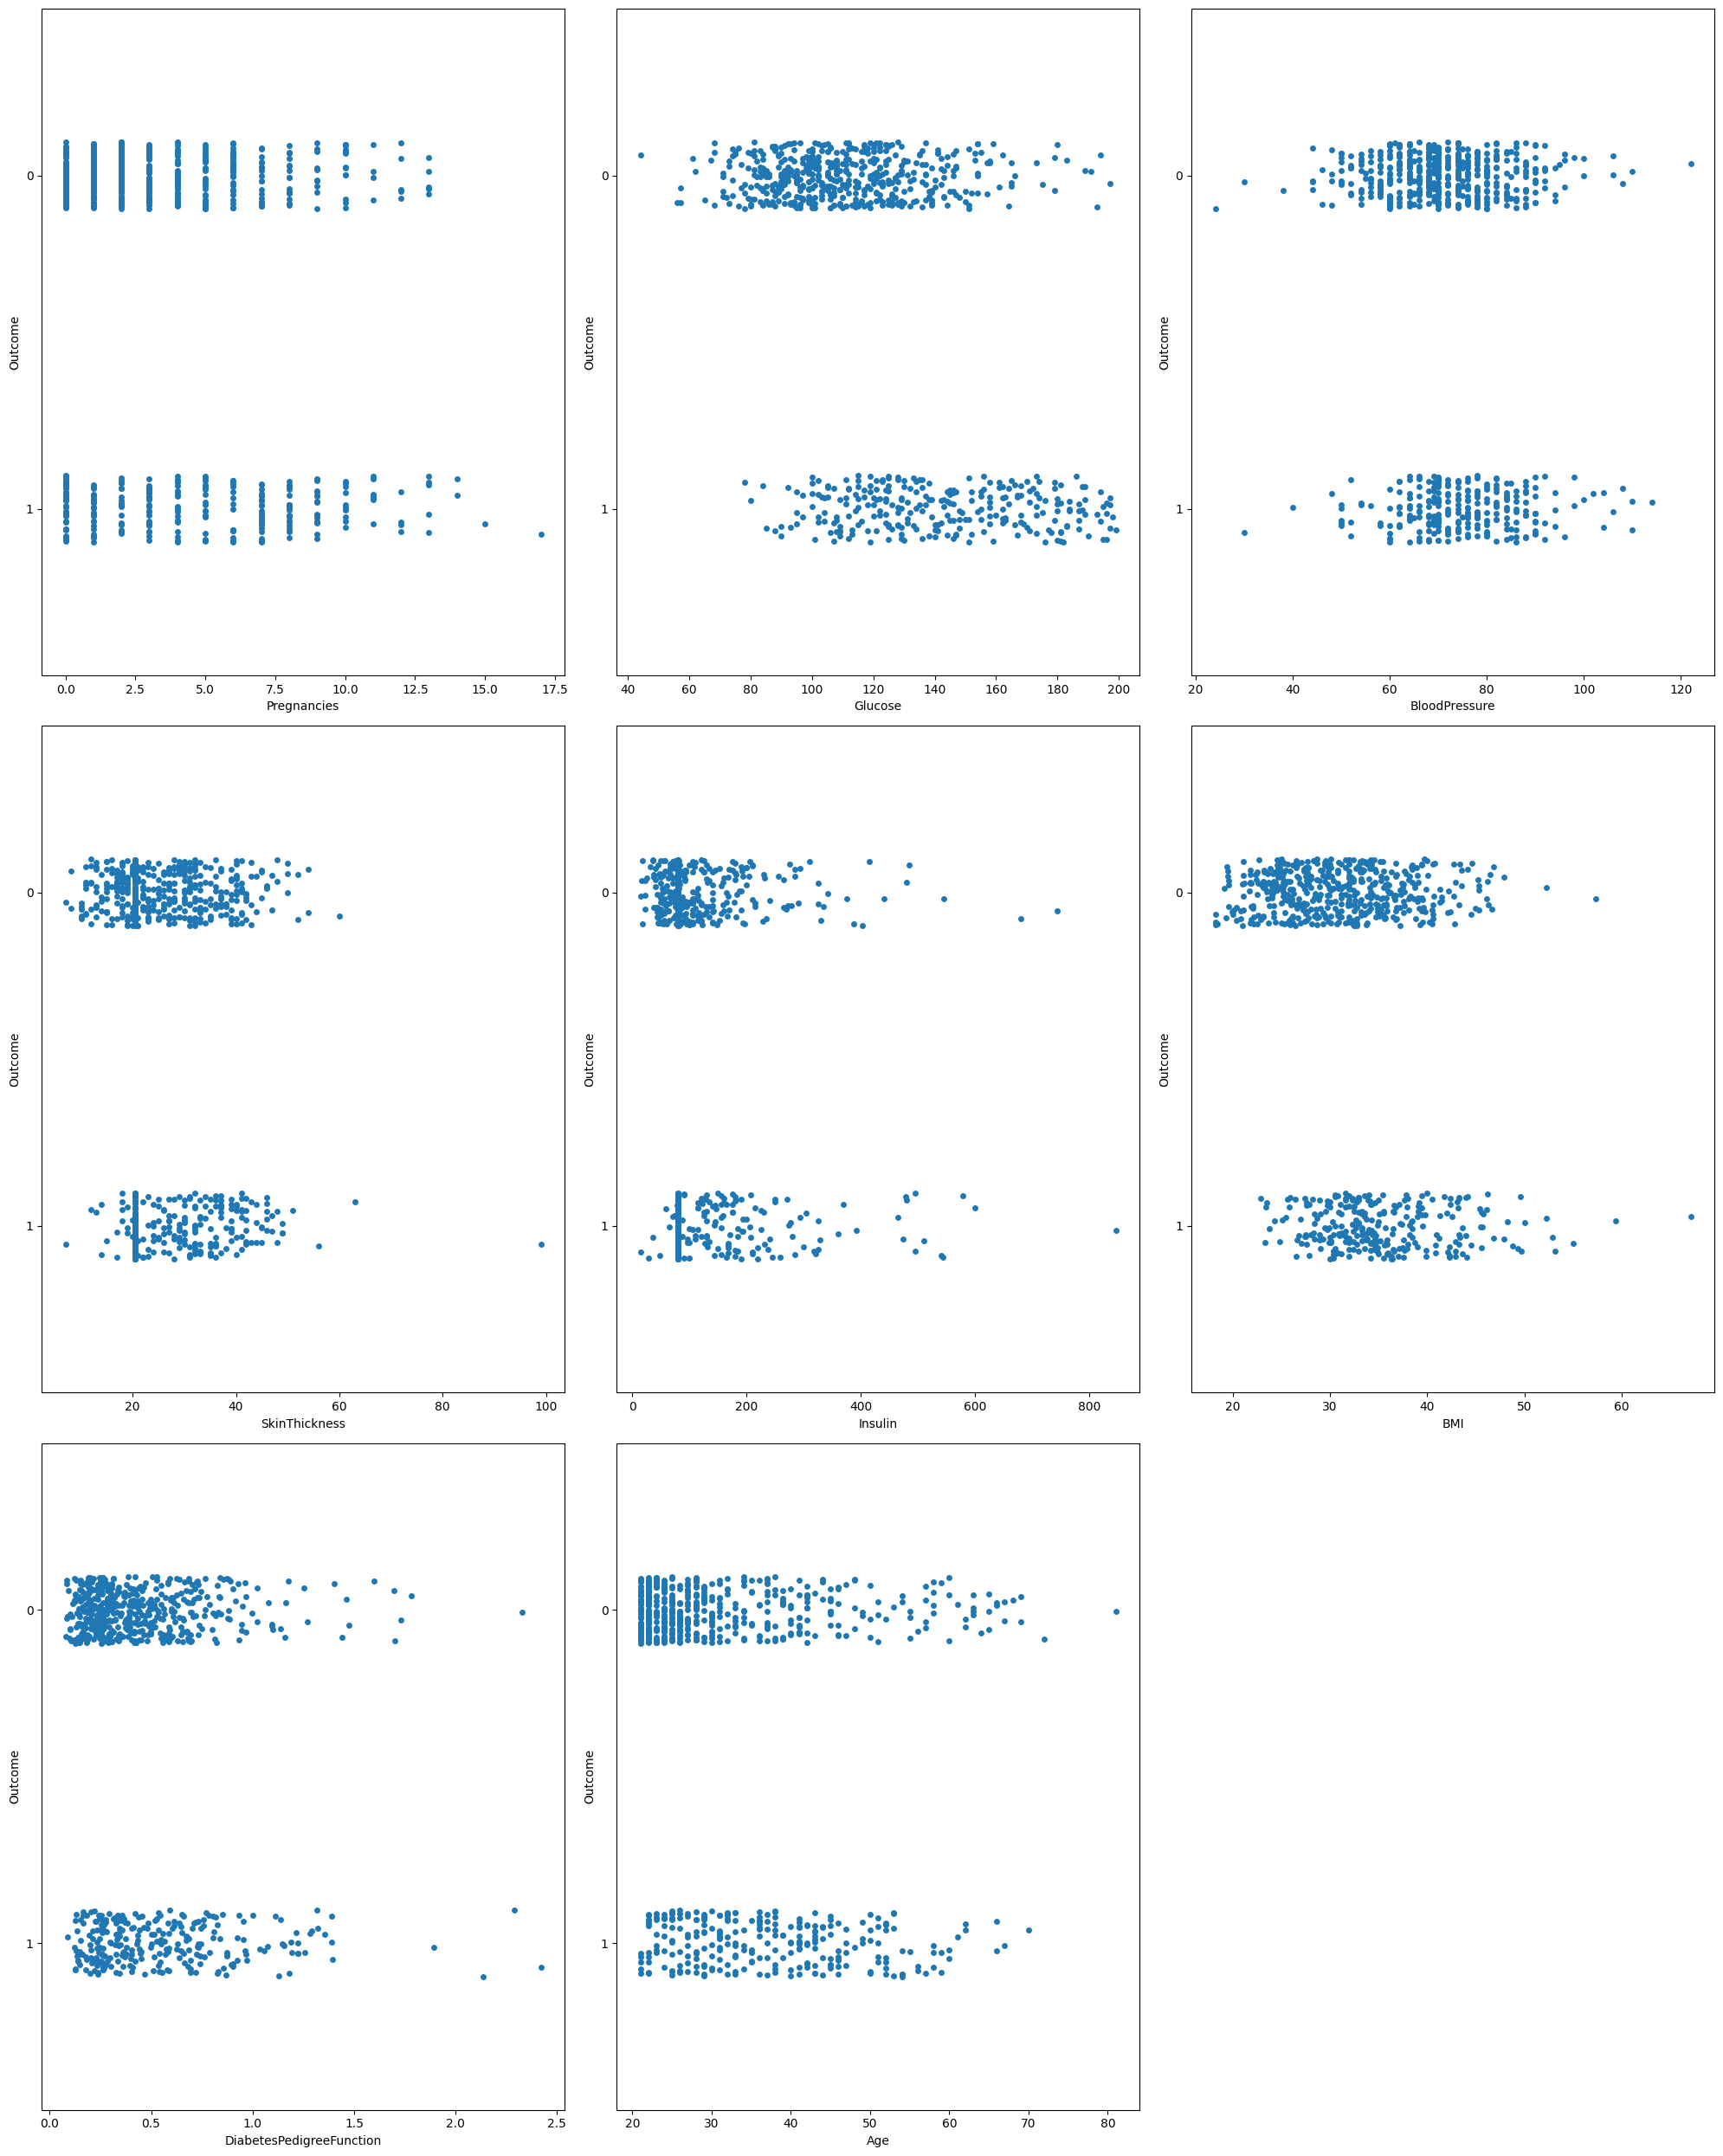

In [13]:
plt.figure(figsize=(20,25),facecolor="white")
plot_num=1

for column in X:
    if plot_num <= 9:
        ax=plt.subplot(3,3,plot_num)
        sns.stripplot(y=y,x=X[column],orient='h')
    plot_num+=1
plt.tight_layout()

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]
        vif                  Features
0  1.431075               Pregnancies
1  1.347308                   Glucose
2  1.247914             BloodPressure
3  1.450510             SkinThickness
4  1.262111                   Insulin
5  1.550227                       BMI
6  1.058104  DiabetesPedigreeFunction
7  1.605441                       Age
0.7760416666666666
[[107  16]
 [ 27  42]]
0.8699186991869918
0.7985074626865671
0.8326848249027238
0.7393071756804525


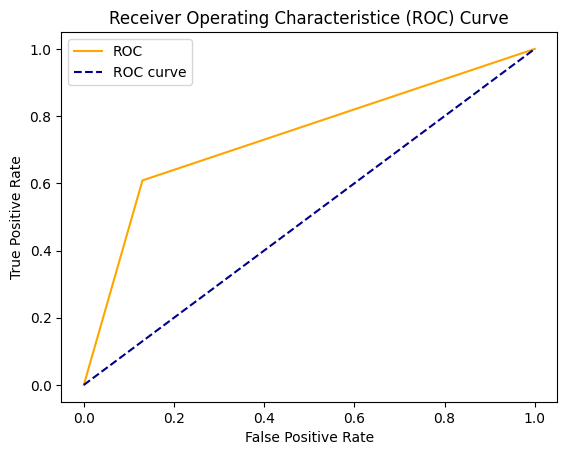

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)


print(X_scaled)


vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns


print(vif)



x_train, x_test,y_train,y_test = train_test_split(X_scaled,y,test_size= 0.25, random_state=True)


log_reg= LogisticRegression()


log_reg.fit(x_train,y_train)

y_pred=log_reg.predict(x_test)


accuracy=accuracy_score(y_pred,y_test)
print(accuracy)


conf_mat= confusion_matrix(y_test, y_pred)
print(conf_mat)



true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

precision=true_positive/(true_positive+false_positive)
print(precision)


recall=true_positive/(true_positive+false_negative)
print(recall)


F1_score=2*(precision*recall)/(recall+precision)
print(F1_score)


auc=roc_auc_score(y_test,y_pred)
print(auc)



fpr,tpr, threshold =roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristice (ROC) Curve')
plt.legend()
plt.show()

